In [52]:
#Data wrangling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#inputs data preparation
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

#modeling
from sklearn.linear_model import LogisticRegression

#model validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [53]:
df = pd.read_csv("3G_with_anomaly_classes.csv")

Verify CS DROP Rate anomaly

In [54]:
anomaly = len(df[df.CSDR_anomaly == 1])
notAnomaly = len(df[df.CSDR_anomaly == 0])
print("Anomaly", anomaly), print('Non-anomaly', notAnomaly)

Anomaly 23
Non-anomaly 202


(None, None)

In [55]:
'''rob_scaler = RobustScaler()
df['CS DROP Rate'] = rob_scaler.fit_transform(df['CS DROP Rate'].values.reshape(-1,1))'''

"rob_scaler = RobustScaler()\ndf['CS DROP Rate'] = rob_scaler.fit_transform(df['CS DROP Rate'].values.reshape(-1,1))"

In [56]:
X = df.loc[:, df.columns == 'CS DROP Rate']
y = df.loc[:, df.columns == 'CSDR_anomaly']

In [57]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)

In [58]:
# instantiate model
model = LogisticRegression()

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

C:\Users\Yasser\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [59]:
# Classification report
classification_report = classification_report(y_test, y_pred)
confMatrix = confusion_matrix(y_test, y_pred)
print("CLASSIFICATION REPORT CS Drop Rate")
print(classification_report)

CLASSIFICATION REPORT CS Drop Rate
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        62
           1       0.67      0.67      0.67         6

    accuracy                           0.94        68
   macro avg       0.82      0.82      0.82        68
weighted avg       0.94      0.94      0.94        68



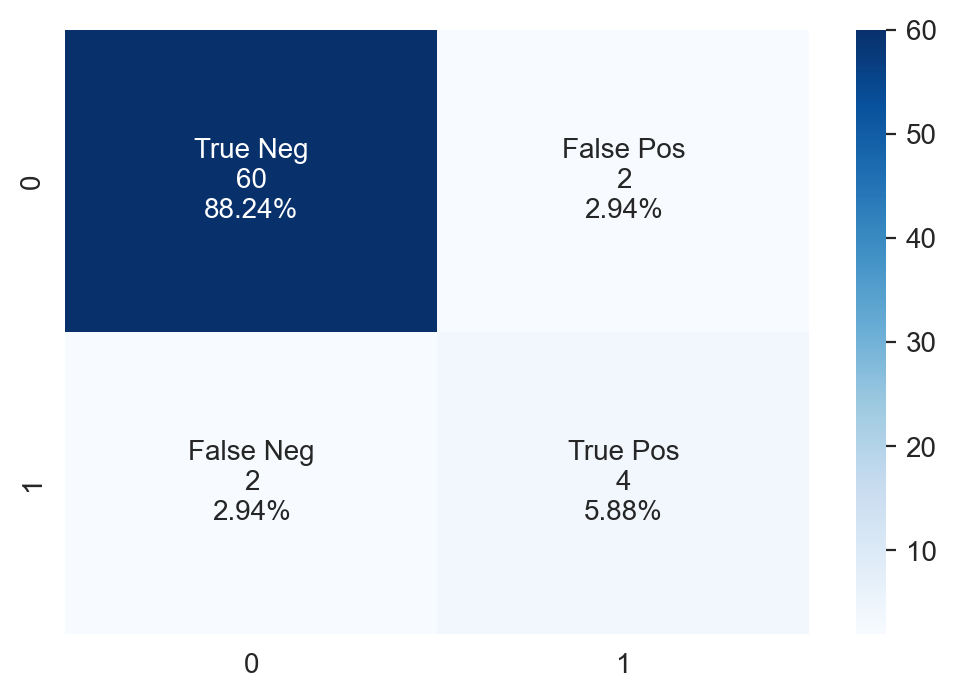

In [60]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confMatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confMatrix.flatten()/np.sum(confMatrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.subplots(dpi=200)
ax = sns.heatmap(confMatrix, annot=labels, fmt='', cmap='Blues')